# Transformaciones de señales discretas

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Operaciones sobre señales discretas

Se pueden realizar ciertas operaciones matemáticas sobre las señales discretas, que pueden entenderse como transformaciones de las mismas.

***
### Superposición
Las señales pueden sumarse, lo que se conoce como el principio de superposición. La superposición ponderada $x[n]$ de dos señales $x_1[n]$ y $x_2[n]$ está dada por:

\begin{equation}
x[n] = A \cdot x_1[n] + B \cdot x_2[n]
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

**Ejemplo:**

En el siguiente ejemplo las amplitudes de dos señales harmónicas $x[n] = A \cdot \cos[\omega_1 n] + B \cdot \cos[\omega_2 n]$ con ponderaciones $A$, $B$ y frecuencias angulares $\omega_1$ y $\omega_2$.

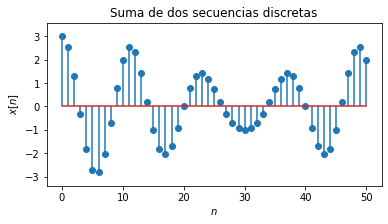

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = np.arange(0, 51)
x = np.cos(2 * np.pi / 10 * n) + 2 * np.cos(2 * np.pi / 12 * n)

plt.figure(figsize=(6, 3))
plt.stem(n, x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.gca().margins(y=0.1)
plt.title('Suma de dos secuencias discretas')
plt.show()

***
### Desplazamiento  o desfase

Las señales pueden desplazarse. El desfase temporal de una señal en una cantidad $\kappa$ es una operación muy frecuente en el procesamiento de señales. El desfase de una señal $s[n]$ en un índice $\kappa$ se define como:

\begin{equation}
x[n] = s[n-\kappa]
\end{equation}

con $\kappa \in \mathbb{Z}$. La señal $s[n]$ se

* mueve hacia la derecha (*retrasa*) para $\kappa > 0$
* mueve hacia la izquierda (*adelanta*) para $\kappa < 0$

Una forma de ver comprobar esto es verificar donde queda el origen de la nueva señal trasladada respecto a la señal original. Para esto, se evalúa el argumento cuando es igual a cero.

El desfase de una señal es una operación frecuente en el procesamiento discreto de señales. Por ejemplo, para la descripción de sistemas mediante ecuaciones de diferencias lineales con coeficientes constantes. Para una señal discreta que se ha construido mediante el [muestreo temporal de una señal continua](../sampling/ideal.ipynb), el desfase se puede interepretar como un [desplazamiento temporal](../continuous_signals/operations.ipynb#Temporal-Shift) en una cantidad temporal $\tau = \kappa \cdot T$ donde $T$ denota el intervalo de muestreo. 

**Ejemplo**

Con el objetivo de mostrar el desplazamiento de señales, la construcción de una [señal diente de sierra](https://en.wikipedia.org/wiki/Sawtooth_wave) mediante la superposición señales rampa desplazadas $n \cdot \sqcap_N[n]$ se muestra en el sigiuente código. La señal diente de sierre se construye como una continuación periódica de la señal rampa

\begin{equation}
x[n] = \sum_{\nu = -\infty}^{\infty} (n - \nu \cdot N) \cdot \sqcap_N[n - \nu \cdot N]
\end{equation}

Esta señal se puede calcular eficientemente mediante la [operación modulo](https://en.wikipedia.org/wiki/Modulo_operation)

\begin{equation}
x[n] = n \bmod N
\end{equation}

que se ilustra en el siguiente ejemplo:

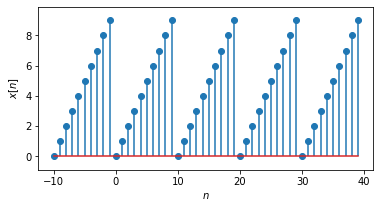

In [3]:
def sawtooth(n, N):
    return np.mod(n, N)


n = np.arange(-10, 40)
x = sawtooth(n, 10)

plt.figure(figsize=(6, 3))
plt.stem(n, x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.gca().margins(y=0.1)

### Reversión o espejamiento

La reversión de una señal $s[n]$ se define como

\begin{equation}
x[n] = s[\kappa - n]
\end{equation}

con $\kappa \in \mathbb{Z}$. Esta operación de espejamiento se puede representar también como una reversión del índice $n$ de la señal $s[k]$ seguido por un desplazamiento de $\kappa$ de la señal reversada, como $s[\kappa - n] = s[- (n - \kappa)]$. La operación se interpreta en forma geométrica como un espejamuento de la señal $s[n]$ en torno al eje vertical $n = \frac{\kappa}{2}$.

Para $\kappa = 0$ esto resulta en la señal reversada. Esta reversión se puede interpretar como una reversión temporal para una señal discreta que ha sido muestreada a partir de una señal contínua.

**Ejemplo**

El siguiente ejemplo ilustra la reversión temporal de la señal diente de sierra anterior para $\kappa = 3$.

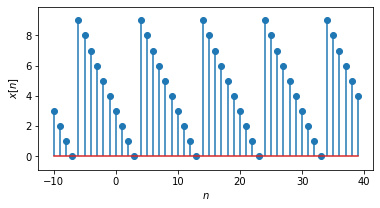

In [4]:
x = sawtooth(3 - n, 10)

plt.figure(figsize=(6, 3))
plt.stem(n, x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.gca().margins(y=0.1)

***
### Escalamiento

El escalamiento de una señal discreta no existe como tal, porque el escalar implica una operación de re-muestreo, pero si se puede interpretar en término de dos operaciones muy utilizadas en el procesamiento discreto de señales: [interpolación o upsampling](https://en.wikipedia.org/wiki/Interpolation) y [decimación o downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)). Interpolar implica intercalar muestras, mientras decimar es quitar muestras de la señal.

**Ejemplo:**

Veamos que sucede cuando se interpola la función diente de sierra anterior agregando una muestra por medio:

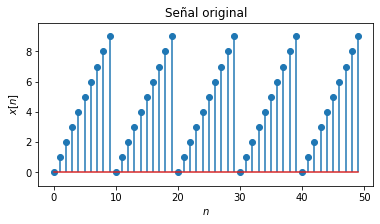

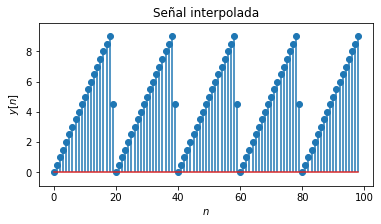

In [6]:
from scipy.interpolate import interp1d
from scipy import signal

import numpy as np

n = np.linspace(0, 49, 50)
x = sawtooth(n, 10)
ki = np.linspace(0, 49, 99)


plt.figure(figsize=(6, 3))
plt.stem(x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.gca().margins(y=0.1)
plt.title('Señal original')


y = np.interp(ki,n,x)

plt.figure(figsize=(6, 3))
plt.stem(y, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.gca().margins(y=0.1)
plt.title('Señal interpolada')
plt.show()

**Ejemplo:**

Veamos ahora que sucede cuando se decima la función diente de sierra anterior quitando una muestra por medio:

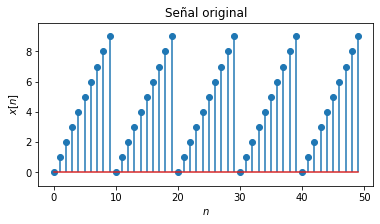

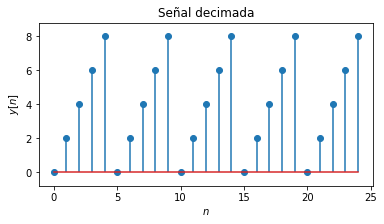

In [7]:
from scipy.interpolate import interp1d
from scipy import signal

import numpy as np

n = np.linspace(0, 49, 50)
x = sawtooth(n, 10)
ki = np.linspace(0, 49, 25)


plt.figure(figsize=(6, 3))
plt.stem(x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.gca().margins(y=0.1)
plt.title('Señal original')


y = x[0::2]
plt.figure(figsize=(6, 3))
plt.stem(y, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.gca().margins(y=0.1)
plt.title('Señal decimada')
plt.show()

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>